In [1]:
import numpy as np
from time import sleep

In [2]:
def loadDataSet(fileName):      
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr, yArr): # using Noraml Equation to optimize the weights
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0: # calculate the 行列式
        print("this matrix cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * yMat)
    return ws        

In [3]:
xArr, yArr = loadDataSet('ex0.txt')
# xArr[0:4]
ws = standRegres(xArr, yArr)
print(ws)

[[3.00774324]
 [1.69532264]]


In [4]:
xMat = np.mat(xArr); yMat = np.mat(yArr)
y_pred = xMat*ws  # This is the predicted y
# xMat[:,1].flatten().A[0] # flatten 之后取 A[0] 就可以将 二维 边一维

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

xCopy = xMat.copy()
xCopy.sort(0)
y_pred = xCopy*ws
ax.plot(xCopy[:,1], y_pred, c='r')
plt.savefig("linear_regression.png")
plt.show()

<Figure size 640x480 with 1 Axes>

## Locally weighted linear regression function

In [6]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws  # identical to y_pred

def lwlrTest(testArr, xArr, yArr, k=1.0):
    # loop over all the data points and applies lwlr to each one
    m = np.shape(testArr)[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = lwlr(testArr[i], xArr, yArr, k)
    return y_pred

def showLwlrPlot(xArr, yArr, k=1.0):
    y_pred = lwlrTest(xArr, xArr, yArr, k)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    srtInd = xMat[:, 1].argsort(0)  # 将 x 轴从小到大排序
#     print('srtInd:', srtInd)
    xSort = xMat[srtInd][:, 0, :]
#     print('xSort:',xSort)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xSort[:, 1], y_pred[srtInd])
    ax.scatter(xMat[:,1].flatten().A[0], yMat.T.flatten().A[0], s=2, c='red')
    plt.show()

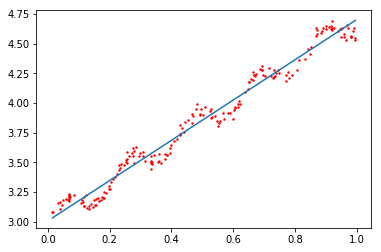

In [7]:
showLwlrPlot(xArr, yArr)

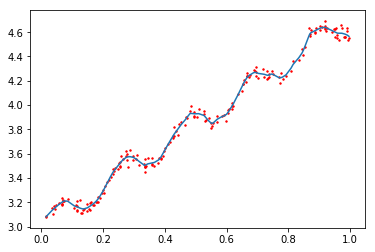

In [8]:
showLwlrPlot(xArr, yArr, 0.01)

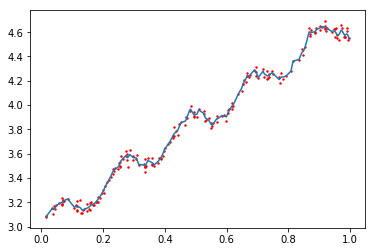

In [9]:
showLwlrPlot(xArr, yArr, 0.005)

# Example: predicting the age of an abalone

In [10]:
def rssError(yArr, y_pred):
    # return a single number describing the error of our estimate
    return ((yArr-y_pred)**2).sum()

In [11]:
abaX, abaY = loadDataSet('abalone.txt')
y_pred01= lwlrTest(abaX[0:99], abaX[0:99], abaY[0:99], 0.1)
y_pred1= lwlrTest(abaX[0:99], abaX[0:99], abaY[0:99], 1)
y_pred10= lwlrTest(abaX[0:99], abaX[0:99], abaY[0:99], 10)

# using a smaller kernel will give us a lower error
print("when k=0.1, the Error :",rssError(abaY[0:99], y_pred01.T))
print("when k=1, the Error:",rssError(abaY[0:99], y_pred1.T))
print("when k=10, the Error:",rssError(abaY[0:99], y_pred10.T))

when k=0.1, the Error : 56.78868743048742
when k=1, the Error: 429.8905618704059
when k=10, the Error: 549.1181708828803
